## Prediction of onset of Diabates based on diagnostic measures 

The dataset used is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The diagnostic measures in the dataset comprise of No. of Pregnancies, Glucose Level(mg/dL), Blood Pressure(mm Hg), Skin Thickness(mm), Insulin Level(mu U/ml), BMI(weight in kg/(height in m)^2) and Age(years)

### Week-1 Data Exploration

In [67]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
#loading the data file

df=pd.read_csv("health care diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
df.shape

(768, 9)

In [70]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [71]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [73]:
np.transpose(df.describe())

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [74]:
#checking for null values
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

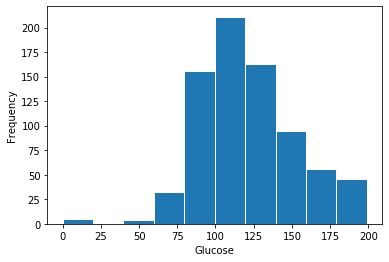

In [75]:
#Checking the data distribution of Glucose (mg/dL)
plt.hist(df['Glucose'],ec='white')
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

In [76]:
df['Glucose'].value_counts()

100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64

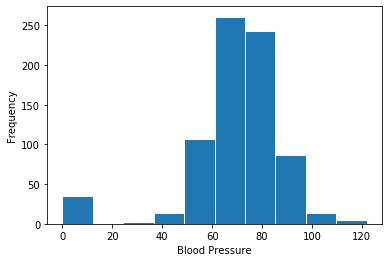

In [77]:
#Checking the data distribution of Blood Pressure(mm Hg)
plt.hist(df['BloodPressure'],ec='white')
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.show()

In [78]:
df['BloodPressure'].value_counts().head(10)

70    57
74    52
68    45
78    45
72    44
64    43
80    40
76    39
60    37
0     35
Name: BloodPressure, dtype: int64

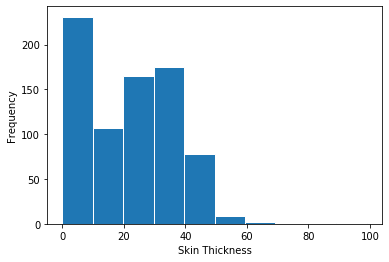

In [79]:
#Checking the data distribution of Skin Thickness(mm)
plt.hist(df['SkinThickness'],ec='white')
plt.xlabel("Skin Thickness")
plt.ylabel("Frequency")
plt.show()

In [80]:
df['SkinThickness'].value_counts().head(10)

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
Name: SkinThickness, dtype: int64

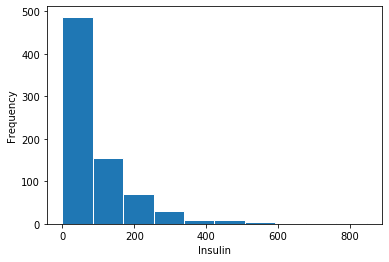

In [81]:
#Checking the data distribution of Insulin(mu U/ml)
plt.hist(df['Insulin'],ec='white')
plt.xlabel("Insulin")
plt.ylabel("Frequency")
plt.show()

In [82]:
df['Insulin'].value_counts().head(10)

0      374
105     11
140      9
130      9
120      8
100      7
94       7
180      7
110      6
115      6
Name: Insulin, dtype: int64

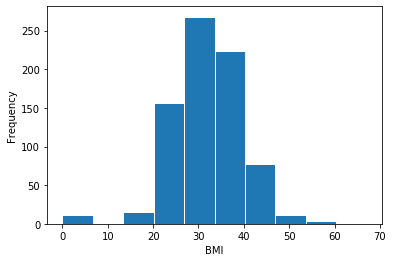

In [83]:
#Checking the data distribution of BMI(weight in kg/(height in m)^2)
plt.hist(df['BMI'],ec='white')
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

In [84]:
df['BMI'].value_counts().head(10)

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
32.4    10
32.8     9
30.8     9
32.9     9
30.1     9
Name: BMI, dtype: int64

In [85]:
#Determining the number of zero values in these columns
print("Glucose",df[df['Glucose']==0].Glucose.value_counts().values)
print("Blood Pressure",df[df['BloodPressure']==0].BloodPressure.value_counts().values)
print("Skin Thickness",df[df['SkinThickness']==0].SkinThickness.value_counts().values)
print("Insulin",df[df['Insulin']==0].Insulin.value_counts().values)
print("BMI",df[df['BMI']==0].BMI.value_counts().values)

Glucose [5]
Blood Pressure [35]
Skin Thickness [227]
Insulin [374]
BMI [11]


### Data Cleaning

In [86]:
#Dropping the zero blood pressure values
df=df.drop(df[df['BloodPressure']==0].index)
df.shape

(733, 9)

In [87]:
#Dropping the zero glucose values
df=df.drop(df[df['Glucose']==0].index)
df.shape

(728, 9)

In [88]:
#Dropping the zero skin thickness values
df=df.drop(df[df['SkinThickness']==0].index)
df.shape

(534, 9)

In [89]:
#Dropping the zero insulin values
df=df.drop(df[df['Insulin']==0].index)
df.shape

(393, 9)

In [90]:
#Dropping the zero BMI values
df=df.drop(df[df['BMI']==0].index)
df.shape

(392, 9)

### Week-2 Data Exploration

In [91]:
#checking data balance
df['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

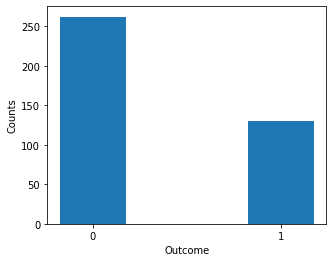

In [92]:
#plotting data outcome counts
plt.figure(figsize=(5,4))
A=plt.bar(df['Outcome'].value_counts().index,height=df['Outcome'].value_counts().values,width=0.35,align='center')
plt.xticks(df['Outcome'].value_counts().index)
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

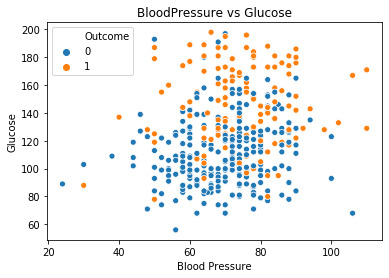

In [93]:
#scatter plots
plt.figure(figsize=(6,4))
sns.scatterplot(x= "BloodPressure" ,y= "Glucose",hue="Outcome",data=df)
plt.xlabel('Blood Pressure')
plt.ylabel('Glucose')
plt.title('BloodPressure vs Glucose')
plt.legend(loc='best')
plt.show()

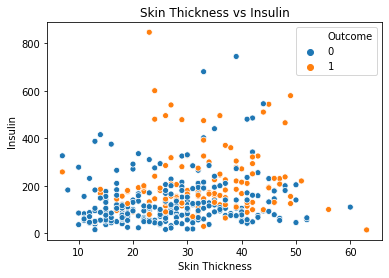

In [94]:
plt.figure(figsize=(6,4))
sns.scatterplot(x= "SkinThickness" ,y= "Insulin",hue="Outcome",data=df)
plt.xlabel('Skin Thickness')
plt.ylabel('Insulin')
plt.title('Skin Thickness vs Insulin')
plt.legend(loc='best')
plt.show()

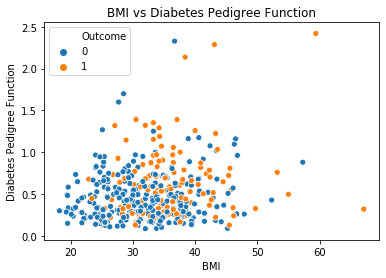

In [95]:
plt.figure(figsize=(6,4))
sns.scatterplot(x= "BMI" ,y= "DiabetesPedigreeFunction",hue="Outcome",data=df)
plt.xlabel('BMI')
plt.ylabel('Diabetes Pedigree Function')
plt.title('BMI vs Diabetes Pedigree Function')
plt.legend(loc='best')
plt.show()

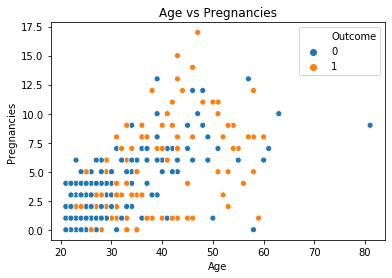

In [96]:
plt.figure(figsize=(6,4))
sns.scatterplot(x= "Age" ,y= "Pregnancies",hue="Outcome",data=df)
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.title('Age vs Pregnancies')
plt.legend(loc='best')
plt.show()

In [97]:
#correlation matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


[]

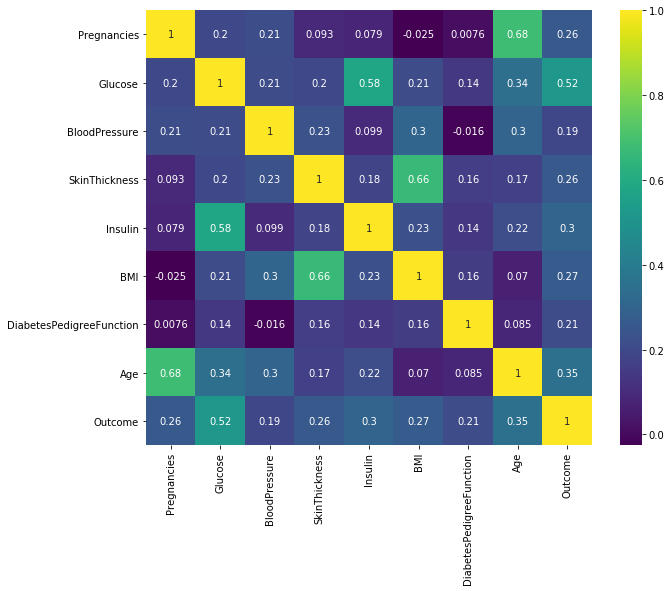

In [98]:
#Heat Map
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.plot()

### Week-3: Data Modelling

In [99]:
#Creating feature matrix and outcome vectos
X=df.iloc[:,[0,1,2,3,4,5,6,7]].values
Y=df['Outcome']
print(X.shape,Y.shape)

(392, 8) (392,)


In [100]:
#Splitting the data into training and testing data sets
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts=train_test_split(X,Y,test_size=0.2,random_state=50)

In [101]:
print(x_tr.shape,x_ts.shape,y_tr.shape,y_ts.shape)

(313, 8) (79, 8) (313,) (79,)


In [102]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(x_tr,y_tr)
y_pr1=log_reg.predict(x_ts)

In [103]:
#importing evaluation matrices
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [104]:
print(confusion_matrix(y_ts,y_pr1))

[[50  6]
 [ 7 16]]


In [105]:
print("Accuracy Score:%.2f"%(accuracy_score(y_ts,y_pr1)*100),"%")
print("AUC:%.2f"%(roc_auc_score(y_ts, y_pr1)))

Accuracy Score:83.54 %
AUC:0.79


In [106]:
print(classification_report(y_pr1,y_ts))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        57
           1       0.70      0.73      0.71        22

    accuracy                           0.84        79
   macro avg       0.79      0.80      0.80        79
weighted avg       0.84      0.84      0.84        79



In [107]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dec_tr = DecisionTreeClassifier(max_depth=4)
dec_tr.fit(x_tr,y_tr)
y_pr2=dec_tr.predict(x_ts)

In [108]:
print(confusion_matrix(y_ts,y_pr2))

[[50  6]
 [ 9 14]]


In [109]:
print("Accuracy Score:%.2f"%(accuracy_score(y_ts,y_pr2)*100),"%")
print("AUC:%.2f"%(roc_auc_score(y_ts, y_pr2)))

Accuracy Score:81.01 %
AUC:0.75


In [110]:
print(classification_report(y_pr2,y_ts))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        59
           1       0.61      0.70      0.65        20

    accuracy                           0.81        79
   macro avg       0.75      0.77      0.76        79
weighted avg       0.82      0.81      0.81        79



In [111]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20)
rf.fit(x_tr,y_tr)
y_pr3=rf.predict(x_ts)

In [112]:
print(confusion_matrix(y_ts,y_pr3))

[[49  7]
 [11 12]]


In [113]:
print("Accuracy Score:%.2f"%(accuracy_score(y_ts,y_pr3)*100),"%")
print("AUC:%.2f"%(roc_auc_score(y_ts, y_pr3)))

Accuracy Score:77.22 %
AUC:0.70


In [114]:
print(classification_report(y_pr3,y_ts))

              precision    recall  f1-score   support

           0       0.88      0.82      0.84        60
           1       0.52      0.63      0.57        19

    accuracy                           0.77        79
   macro avg       0.70      0.72      0.71        79
weighted avg       0.79      0.77      0.78        79



In [115]:
#SVM
from sklearn.svm import SVC
svm=SVC(kernel='linear',gamma='auto')
svm.fit(x_tr,y_tr)
y_pr4=svm.predict(x_ts)

In [116]:
print(confusion_matrix(y_ts,y_pr4))

[[50  6]
 [ 7 16]]


In [117]:
print("Accuracy Score:%.2f"%(accuracy_score(y_ts,y_pr4)*100),"%")
print("AUC:%.2f"%roc_auc_score(y_ts, y_pr4))

Accuracy Score:83.54 %
AUC:0.79


In [118]:
print(classification_report(y_pr4,y_ts))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        57
           1       0.70      0.73      0.71        22

    accuracy                           0.84        79
   macro avg       0.79      0.80      0.80        79
weighted avg       0.84      0.84      0.84        79



In [119]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=12,p=1)
knn.fit(x_tr,y_tr)
y_pr5=knn.predict(x_ts)

In [120]:
print(confusion_matrix(y_ts,y_pr5))

[[49  7]
 [12 11]]


In [121]:
print("Accuracy Score:%.2f"%(accuracy_score(y_ts,y_pr5)*100),"%")
print("AUC:%.2f"%roc_auc_score(y_ts, y_pr5))

Accuracy Score:75.95 %
AUC:0.68


In [122]:
print(classification_report(y_pr5,y_ts))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        61
           1       0.48      0.61      0.54        18

    accuracy                           0.76        79
   macro avg       0.68      0.71      0.69        79
weighted avg       0.78      0.76      0.77        79



In [135]:
acc=[accuracy_score(y_ts,y_pr1),accuracy_score(y_ts,y_pr2),accuracy_score(y_ts,y_pr3),accuracy_score(y_ts,y_pr4),
    accuracy_score(y_ts,y_pr5)]
roc_scr=[roc_auc_score(y_ts,y_pr1),roc_auc_score(y_ts,y_pr2),roc_auc_score(y_ts,y_pr3),roc_auc_score(y_ts,y_pr4),
        roc_auc_score(y_ts,y_pr5)]
clfs=["Logistic Regression","Decision Tree", "Random Forest", "SVM", "kNN"]

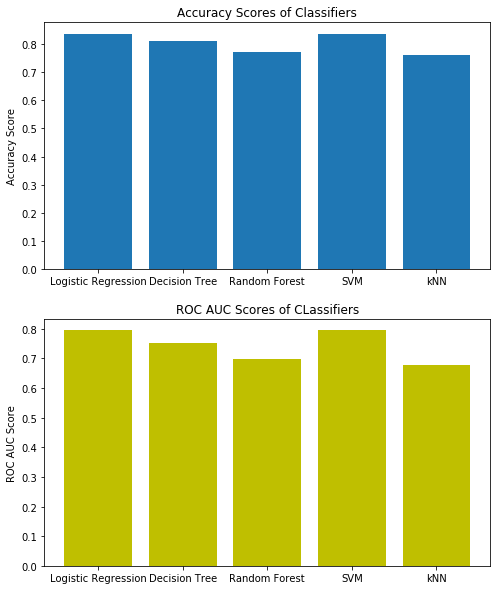

In [149]:
plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.bar(clfs,height=acc)
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Classifiers')
plt.subplot(2,1,2)
plt.bar(clfs,height=roc_scr,color='y')
plt.title("ROC AUC Scores of CLassifiers")
plt.ylabel('ROC AUC Score')
plt.show()

In [124]:
df.to_csv("Final_Dataset.csv")